In [1]:
# pip install transformers tensorflow tf-keras matplotlib pandas seaborn
import pandas as pd
import matplotlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer

2024-04-18 12:19:00.584706: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 12:19:00.589428: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 12:19:00.638210: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 12:19:01.571244: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
classifier = pipeline("text-classification", 
                      model = "j-hartmann/emotion-english-distilroberta-base", # specific model !
                      return_all_scores = False) # True

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
/home/ucloud/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


### Predict emotion scores for all lines in the data


In [3]:
data = pd.read_csv("../../../../cds-lang-data/GoT-scripts/Game_of_Thrones_Script.csv")

In [13]:
data3 = data.head(4000)

for index, row in data3.iterrows():
        if type(row["Sentence"]) == str:
            predicted_emotion = classifier(row["Sentence"])[0]['label']
            data3.loc[index, "predicted_emotion"] = predicted_emotion



/tmp/ipykernel_3084/2380327033.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.loc[index, "predicted_emotion"] = predicted_emotion


In [14]:
data3

,Release Date,Season,Episode,Episode Title,Name,Sentence,predicted_emotion
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,disgust
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,disgust
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,surprise
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,neutral
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,fear
...,...,...,...,...,...,...,...
3995,2012-04-15,Season 2,Episode 3,What Is Dead May Never Die,jeor,"Aye, many a time that monster has been the dif...",neutral
3996,2012-04-15,Season 2,Episode 3,What Is Dead May Never Die,jon snow,I... I saw it. I saw... something take that ch...,surprise
3997,2012-04-15,Season 2,Episode 3,What Is Dead May Never Die,jeor,"Yeah. Whatever it was, I daresay you'll see it...",neutral
3998,2012-04-15,Season 2,Episode 3,What Is Dead May Never Die,jeor,Don't lose it again.,neutral


In [ ]:
def plot_season(df, outpath):
    plot = sns.catplot(df, x = "predicted_emotion", hue = "predicted_emotion", col = "Season", kind = "count", 
                palette = emotion_colors.values(), lengend = False, col_wrap = 4)
    plot.set_axis_labels("", "test")
    plt.savefig(outpath)

def plot_emotion(df, outpath):
    sns.catplot(data3, x = "Season", hue = "Season", col = "predicted_emotion", kind = "count",
                palette = "husl", col_wrap = 4)
    plt.savefig(outpath)


In [48]:
# Define a dictionary mapping emotions to colors
emotion_colors = {"disgust": "purple",
                "surprise": "yellow",
                "neutral": "lightgray",
                "fear": "orange",
                "anger": "red",
                "joy": "green",
                "sadness": "blue"}

# Function to specify color based on emotion
#def color_specifier(emotion):
#    return emotion_colors.get(emotion)


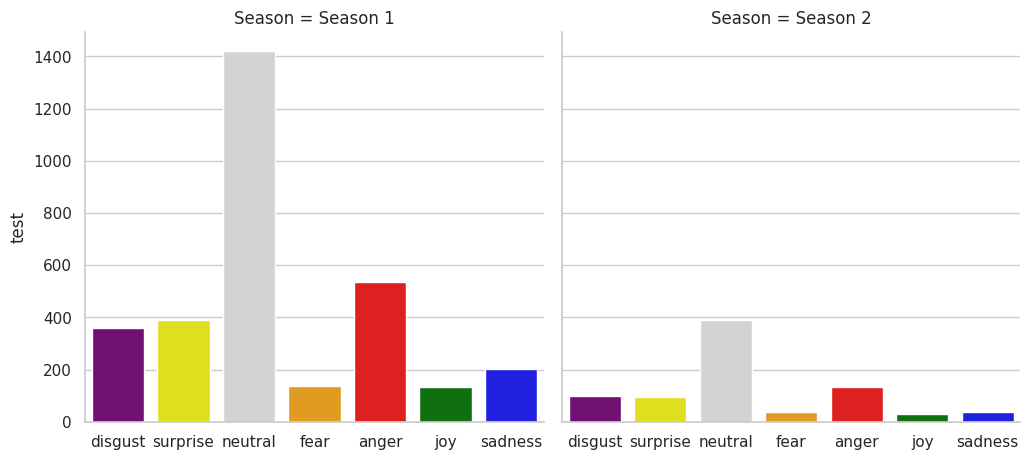

In [49]:
# Apply the color specifier function to the df
#data3["color"] = data3["predicted_emotion"].apply(color_specifier)

plot = sns.catplot(data = data3,
                    x = "predicted_emotion",
                    hue = "color",
                    col = "Season",
                    kind = "count",
                    palette = emotion_colors.values(),
                    legend = False,
                    col_wrap = 4)

plot.set_axis_labels("", "test")
plot.set_axis_labels("", "test")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x800 with 0 Axes>

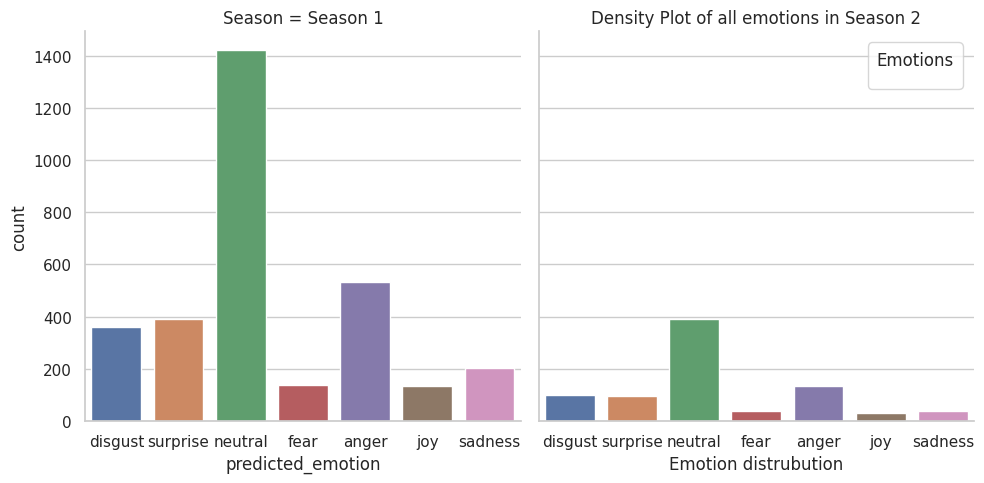

In [18]:
seasons = sorted(data3['Season'].unique())

sns.set(style = "whitegrid")

plt.figure(figsize = (12, 8))

#for season in seasons:
#subset = data3[data3['Season'] == season]
            
sns.catplot(data3, x = "predicted_emotion", hue = "predicted_emotion", col = "Season", kind = "count")

# Plot formatting
plt.legend(title = 'Emotion', loc = 'upper left')
plt.legend(prop = {'size': 16}, title = 'Emotions')
plt.title(f'Density Plot of all emotions in {season}')
plt.xlabel('Emotion distrubution')
plt.ylabel('Density')


plt.show()